In [19]:
#The kernel is using python 3.5 for pandas 0.17
%matplotlib inline

In [20]:
import numpy as np

np.random.seed(100)
ar = np.random.rand(3)
ar.shape

(3,)

In [3]:
ar2 = np.array([1,2,4])
ar2.shape

(3,)

In [21]:
import pandas as pd
memberData = np.zeros((4,),
                     dtype=[('Name','a15'),
                           ('Age','i4'),
                           ('Weight','f4')])


In [5]:
memberData[:] = [('Sanjeev',37,162.4),
                ('YingLuck',45,137.8),
                ('Emeka',28,153.3),
                ('Amy',61,107.3)]
memberDF=pd.DataFrame(memberData);memberDF

,Name,Age,Weight
0,b'Sanjeev',37,162.399994
1,b'YingLuck',45,137.800003
2,b'Emeka',28,153.300003
3,b'Amy',61,107.300003


In [6]:
pd.DataFrame(memberData,index=['a','b','c','d'])

,Name,Age,Weight
a,b'Sanjeev',37,162.399994
b,b'YingLuck',45,137.800003
c,b'Emeka',28,153.300003
d,b'Amy',61,107.300003


In [7]:
memberDF['Weight']

0    162.399994
1    137.800003
2    153.300003
3    107.300003
Name: Weight, dtype: float32

In [8]:
type(memberDF)

pandas.core.frame.DataFrame

In [23]:
football_df=pd.read_csv('./data/E1.csv')

In [33]:
print(football_df.head())
#print(football_df.describe())


  Div      Date      HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR ...  \
0  E1  05/08/16        Fulham  Newcastle     1     0   H     1     0   H ...   
1  E1  06/08/16    Birmingham    Cardiff     0     0   D     0     0   D ...   
2  E1  06/08/16     Blackburn    Norwich     1     4   A     0     3   A ...   
3  E1  06/08/16  Bristol City      Wigan     2     1   H     0     1   A ...   
4  E1  06/08/16         Derby   Brighton     0     0   D     0     0   D ...   

  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA  
0     1.91    32   0.25     2.21     2.14     1.76     1.72  4.39  3.42  2.00  
1     1.65    32  -0.25     2.06     1.98     1.94     1.84  2.53  3.26  3.14  
2     1.62    32   0.25     1.95     1.88     2.00     1.94  3.64  3.33  2.25  
3     1.68    33  -0.25     1.95     1.89     2.00     1.94  2.23  3.50  3.49  
4     1.68    32  -0.25     1.83     1.76     2.13     2.07  2.28  3.31  3.57  

[5 rows x 65 columns]


1.39583333333
1.0
(array([ 1.]), array([ 65.]))


(array([ 49.,   0.,  65.,   0.,  46.,   0.,  20.,   0.,   9.,   3.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

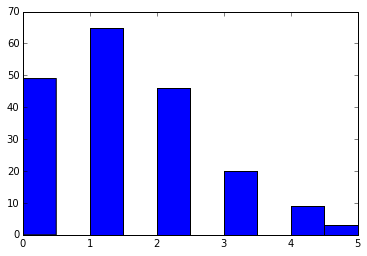

In [32]:
from scipy import stats
%precision 2
print(np.mean(football_df['FTHG']))
print(np.median(football_df['FTHG']))
print(stats.mode(football_df['FTHG']))
plt.hist(football_df['FTHG'])

In [11]:
#print(football_df.set_index(["Date","Div"]))

In [12]:
#football_df.ix['Date']

In [3]:
#chapter 6
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

date_stngs=['2014-05-01','2014-05-02','2014-05-05','2014-05-06','2014-05-07']
tradeDates = pd.to_datetime(pd.Series(date_stngs))
closingprices = [531.35, 527.93,527.81,515.14,509.36]

In [14]:
googClosingPrices = pd.DataFrame(data=closingprices,columns=['closing price'],index=tradeDates)

googClosingPrices

,closing price
2014-05-01,531.35
2014-05-02,527.93
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.36


In [15]:
import pandas.io.data as web
import datetime
googPrices = web.get_data_yahoo("GOOG",start=datetime.datetime(2014,5,1),end=datetime.date(2014,5,7))

In [16]:
googFinalPrices=pd.DataFrame(googPrices['Close'],index=tradeDates)
googFinalPrices

,Close
2014-05-01,531.352435
2014-05-02,527.932411
2014-05-05,527.812392
2014-05-06,515.142330
2014-05-07,509.962321


In [17]:
googClosingPricesCDays=googClosingPrices.asfreq('D')
googClosingPricesCDays

,closing price
2014-05-01,531.35
2014-05-02,527.93
2014-05-03,NaN
2014-05-04,NaN
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.36


In [18]:
googClosingPricesCDays.isnull()

,closing price
2014-05-01,False
2014-05-02,False
2014-05-03,True
2014-05-04,True
2014-05-05,False
2014-05-06,False
2014-05-07,False


In [19]:
googClosingPricesCDays.notnull()

,closing price
2014-05-01,True
2014-05-02,True
2014-05-03,False
2014-05-04,False
2014-05-05,True
2014-05-06,True
2014-05-07,True


In [20]:
tDates=tradeDates.copy()
tDates[1]=np.NaN
tDates[4]=np.NaN
tDates

0   2014-05-01
1          NaT
2   2014-05-05
3   2014-05-06
4          NaT
dtype: datetime64[ns]

In [21]:
pd.set_option('display.precision',4)
FBVolume=[82.34,54.11,45.99,55.86,78.5]
TWTRVolume=[15.74,12.71,10.39,134.62,68.84]
socialTradingVolume=pd.concat([pd.Series(FBVolume),pd.Series(TWTRVolume),tradeDates],axis=1,keys=['FB','TWTR','TradeDate'])
socialTradingVolume


,FB,TWTR,TradeDate
0,82.34,15.74,2014-05-01
1,54.11,12.71,2014-05-02
2,45.99,10.39,2014-05-05
3,55.86,134.62,2014-05-06
4,78.50,68.84,2014-05-07


In [22]:
xmasDay=pd.datetime(2014,12,25)
xmasDay


datetime.datetime(2014, 12, 25, 0, 0)

In [23]:
boxingDay=xmasDay+pd.DateOffset(days=-1)
boxingDay

Timestamp('2014-12-24 00:00:00')

In [24]:
today=pd.datetime.now()
today

datetime.datetime(2016, 11, 12, 1, 59, 4, 726513)

In [27]:
lastDay=pd.datetime(2016,1,1)
from pandas.tseries.offsets import QuarterBegin
dtoffset=QuarterBegin()
lastDay+dtoffset

Timestamp('2016-03-01 00:00:00')

In [7]:
googTickData=pd.read_csv('./data/GOOG_tickdata_20140527.csv')
googTickData.head()

,Timestamp,close,high,low,open,volume
0,1401197402,555.008,556.41,554.35,556.38,81100
1,1401197460,556.250,556.30,555.25,555.25,18500
2,1401197526,556.730,556.75,556.05,556.39,9900
3,1401197582,557.480,557.67,556.73,556.73,14700
4,1401197642,558.155,558.66,557.48,557.59,15700


In [14]:
googTickData['tstamp']=pd.to_datetime(googTickData['Timestamp'],unit='s',utc=True)
googTickData.head()

,Timestamp,close,high,low,open,volume,tstamp
0,1401197402,555.008,556.41,554.35,556.38,81100,2014-05-27 13:30:02
1,1401197460,556.250,556.30,555.25,555.25,18500,2014-05-27 13:31:00
2,1401197526,556.730,556.75,556.05,556.39,9900,2014-05-27 13:32:06
3,1401197582,557.480,557.67,556.73,556.73,14700,2014-05-27 13:33:02
4,1401197642,558.155,558.66,557.48,557.59,15700,2014-05-27 13:34:02


In [24]:
googTickTS=googTickData.set_index('tstamp')
googTickTS=googTickTS.drop('Timestamp',axis=1)
print(googTickTS.head())
print(len(googTickTS))

                       close    high     low    open  volume
tstamp                                                      
2014-05-27 13:30:02  555.008  556.41  554.35  556.38   81100
2014-05-27 13:31:00  556.250  556.30  555.25  555.25   18500
2014-05-27 13:32:06  556.730  556.75  556.05  556.39    9900
2014-05-27 13:33:02  557.480  557.67  556.73  556.73   14700
2014-05-27 13:34:02  558.155  558.66  557.48  557.59   15700
390


In [29]:
pd.set_option('display.precision',5)
googTickTS.resample('10Min',how=np.min).head(6)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:00,555.008,556.3000,554.3500,555.25,9900
2014-05-27 13:40:00,556.190,556.5600,556.1300,556.35,3500
2014-05-27 13:50:00,554.770,555.5500,554.7700,555.55,3400
2014-05-27 14:00:00,554.580,554.9847,554.4500,554.58,1800
2014-05-27 14:10:00,556.500,556.9700,556.2947,556.66,2800
2014-05-27 14:20:00,556.930,557.0300,556.7100,556.71,1600


In [30]:
pd.set_option('display.precision',5)
googTickTS.resample('10Min',closed='right').head(6)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:00,556.7978,557.3727,556.4168,556.9004,24345.4545
2014-05-27 13:40:00,556.8028,557.0344,556.5117,556.7789,9655.5556
2014-05-27 13:50:00,556.3139,556.6450,556.1610,556.5196,13480.0000
2014-05-27 14:00:00,555.6571,555.8577,555.2614,555.4436,12109.0909
2014-05-27 14:10:00,557.2918,557.5704,557.0917,557.2817,6944.4444
2014-05-27 14:20:00,557.4159,557.5710,557.1722,557.3500,6030.0000


In [40]:
googTickTS[:3].resample('30s',fill_method='bfill')

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:00,555.008,556.41,554.35,556.38,81100
2014-05-27 13:30:30,556.250,556.30,555.25,555.25,18500
2014-05-27 13:31:00,556.250,556.30,555.25,555.25,18500
2014-05-27 13:31:30,556.730,556.75,556.05,556.39,9900
2014-05-27 13:32:00,556.730,556.75,556.05,556.39,9900


In [45]:
googTickTS.resample('7T30S').head(5)

,close,high,low,open,volume
tstamp,,,,,
2014-05-27 13:30:00,556.8266,557.4362,556.3144,556.8800,28075.0000
2014-05-27 13:37:30,556.5889,556.9342,556.4264,556.7206,11642.8571
2014-05-27 13:45:00,556.9921,557.2185,556.7171,556.9871,9800.0000
2014-05-27 13:52:30,556.1824,556.5375,556.0350,556.3896,14350.0000
2014-05-27 14:00:00,555.2111,555.4368,554.8288,554.9675,12512.5000


In [2]:
import pandas as pd
pd.Period('2014',freq='A-MAY')

Period('2014', 'A-MAY')

In [3]:
pd.Period('11/11/2013')+4

Period('2013-11-15', 'D')

In [5]:
pd.Period('10/10/2014') - pd.Period('11/11/2013') 

333

In [10]:
perRng=pd.period_range('2/1/2014','2/16/2014',freq='D')
type(perRng)
print(perRng[:4])

<class 'pandas.tseries.period.PeriodIndex'>
[2014-02-01, ..., 2014-02-04]
Length: 4, Freq: D


In [11]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
f,g = np.cos(X)+np.sin(X),np.sin(X)-np.cos(X)
f_ser = pd.Series(f)
g_ser = pd.Series(g)

In [12]:
plotDF=pd.concat([f_ser,g_ser],axis=1)
plotDF.index=X
plotDF.columns=['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()

,sin(x)+cos(x),sin(x)-cos(x)
-3.141593,-1.000000,1.000000
-3.116953,-1.024334,0.975059
-3.092313,-1.048046,0.949526
-3.067673,-1.071122,0.923417
-3.043033,-1.093547,0.896747


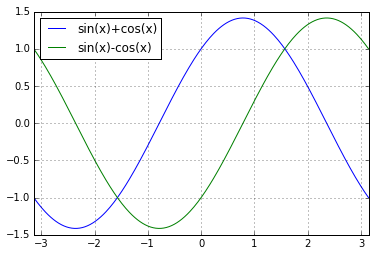

In [14]:
%matplotlib inline
plotDF.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bb1ad1fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8bb1938828>], dtype=object)

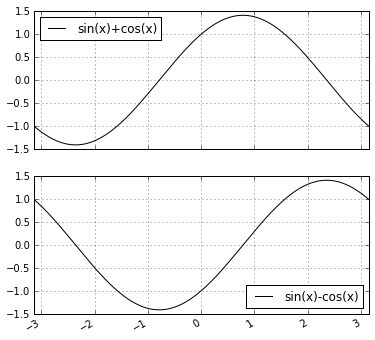

In [16]:
plotDF.plot(subplots=True,figsize=(6,6))

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

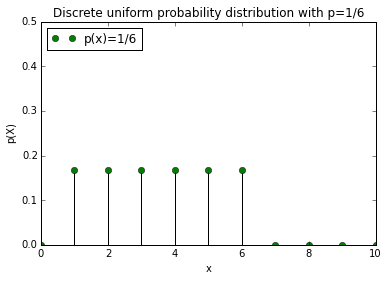

In [53]:
X = range(0,11)
Y = [1/6.0 if x in range(1,7) else 0.0 for x in X]
plt.plot(X,Y,'go-',linewidth=0,drawstyle='steps-pre',label='p(x)=1/6')
plt.legend(loc="upper left")
plt.vlines(range(1,7),0,max(Y),linestyle='-')
plt.xlabel('x')
plt.ylabel('p(X)')
plt.ylim(0,0.5)
plt.xlim(0,10)
plt.title('Discrete uniform probability distribution with p=1/6')
plt.show()

In [51]:
import datetime as dt


range(1, 20)